In [2]:
import joblib
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

#나이브베이즈
from sklearn.naive_bayes import MultinomialNB

#SVM, SVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

#knn
from sklearn.neighbors import KNeighborsClassifier

#DecisionTree
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import linear_kernel

from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.multiclass import OneVsRestClassifier

from sklearn.impute import SimpleImputer
##
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score , ShuffleSplit
from sklearn import metrics
from sklearn.metrics import roc_curve , roc_auc_score , f1_score , classification_report
## plot
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
comp_raw=pd.read_excel('./data/company_final_new_210222.xlsx')
support_raw=pd.read_excel('./data/support_final_new_210222.xlsx')  #다시 토큰화한 support data

In [172]:
company=comp_raw
support=support_raw

In [173]:
company.head(1)

,Unnamed: 0,내역사업명,title,연구목표,연구내용,기대효과,사업명,부처명,지역구분,6T관련기술분류,...,연구_kkma,krwr_okt,krwr_han,all_word,category,okt_han_kkma_krwrhan,okt_han_kkma,krwrokt_krwrhan,okt_hannanum,okt_han_krwrhan
0,0,2020년도 창업성장기술개발사업 전략형 창업과제 BIG3 제1차 시행계획 공고,전략형창업과제,적용 모터 분석 구동부 설계 궤도 설계 차체설계 및 제작 샤시설계 및 제작 전장 시...,적용 모터 분석 전기자동차 적용 모터 분석 및 최적화 모델 검색 감속기 적용 감속비...,프로토 타입 제작 완료를 통한제품 성능평가 제품 설계 완성 및 조립도 완성 샤시와 ...,창업성장기술개발 R D,중소벤처기업부,경기,위의 미래유망신기술 6T 103개 세분류에 속하지 않는 기타 연구,...,감속기 big 다목적 프로그래밍 pto ux smart 모델링 multipurpos...,와이어 로봇 컨트롤러 주행 인터페이스 프로그래밍 공장 카티아 충전 ui multip...,현가장치 로봇 컨트롤러 물리적 용접포인트 4ir 인터페이스 외부충격 프로그래밍 인허...,작동부 동력전달 용접 4ir 속하지 생산성 하우징 cell 차연도 설계도서 와이어 ...,4,공고프로토 모터부 자동차 주행 구동부 하네스 계산한 차연도 car 용접 big 미래...,자동차 공고프로토 모터부 구동부 주행 하네스 car 용접 big 미래유망신기술 시스...,자동차 ui 컨트롤러 성능평가 로봇 주행 대비한 구동부 와이어링 하네스 multip...,자동차 공고프로토 모터부 주행 구동부 하네스 car 용접 big 미래유망신기술 베터...,자동차 공고프로토 모터부 구동부 주행 하네스 car 용접 big 미래유망신기술 카티...


In [174]:
del company['Unnamed: 0']
del support['Unnamed: 0']

In [175]:
print(company.shape)
print(support.shape)

(7202, 27)
(1787, 20)


comp_comp = company['부처명'].tolist()
sup_comp = support['소관부처'].tolist()
comp_list=list(set(comp_comp+sup_comp))

category_dict_encod={}
category_dict_decod={}

for key,name in enumerate(comp_list):
    category_dict_encod.update({name:key})
    category_dict_decod.update({key:name})
print(category_dict_encod)
print(category_dict_decod)

company['category']=company['부처명'].apply(lambda x:category_dict_encod[x])

# tfidf.fit
okt_han_kkma + all_word_new

In [176]:
X_train, X_test, y_train, y_test = train_test_split(company['okt_han_kkma'], company.category,\
                                                    shuffle=True, random_state=1, \
                                                    stratify = company.category)


#comp_word=company['all_word'].tolist()
X_train_pd=pd.DataFrame(X_train)
comp_word=X_train_pd['okt_han_kkma'].tolist()
sup_word=support['all_word_new'].tolist()
word_list=list(set(comp_word+sup_word))

tfidf = TfidfVectorizer(analyzer = 'word', ngram_range = (1,2), min_df =5, sublinear_tf = True)
tfidf.fit(word_list)

TfidfVectorizer(min_df=5, ngram_range=(1, 2), sublinear_tf=True)

In [177]:
pipe_svc=Pipeline([('tfidf', tfidf),
                   ('svc', SVC(kernel='sigmoid', C=10, gamma=1, random_state=42,  probability=True))])


# tfidf : okt_han_kkma + all_word_new
# X_train : okt_han_kkma
pipe_svc.fit(X_train, y_train)
pred_y = pipe_svc.predict(X_test)
accuracy=accuracy_score(pred_y, y_test)

print("Accuracy Score : {0:.3f}", format(accuracy))
print(classification_report(y_test, pred_y))


Accuracy Score : {0:.3f} 0.9550249861188229
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       189
           1       0.00      0.00      0.00         3
           2       1.00      0.94      0.97        18
           3       1.00      0.44      0.62         9
           4       0.98      0.99      0.98      1210
           5       0.90      0.94      0.92       371
           6       0.00      0.00      0.00         1

    accuracy                           0.96      1801
   macro avg       0.68      0.59      0.62      1801
weighted avg       0.95      0.96      0.95      1801



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


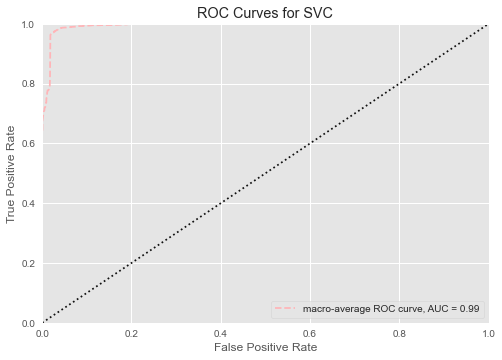

<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [178]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(pipe_svc, classes=[0,1,2,3,4,5,6], micro=False, macro=True, per_class=False)
plt.title('ROC Curves for LinearSVC')
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

0.9550249861188229

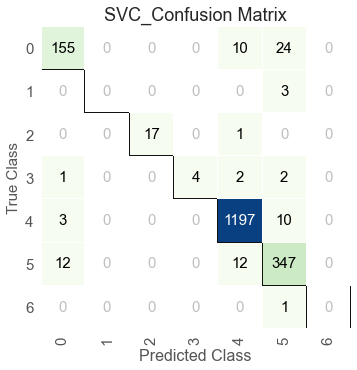

In [179]:
from yellowbrick.classifier import ConfusionMatrix

plt.figure()
plt.title("SVC_Confusion Matrix", fontsize=18)
plt.xlabel("Predicted Class", fontsize=16)
plt.ylabel("True Class", fontsize=15)

cm = ConfusionMatrix(pipe_svc, classes=[0,1,2,3,4,5,6], size=(400,400),fontsize=15, cmap='GnBu')
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [180]:
joblib.dump(pipe_svc,'./data/model/finl_svc_model.pkl')

['./data/model/finl_svc_model.pkl']

-----------------

예전 테스트 결과  
혹시 몰라서 남겨둠.

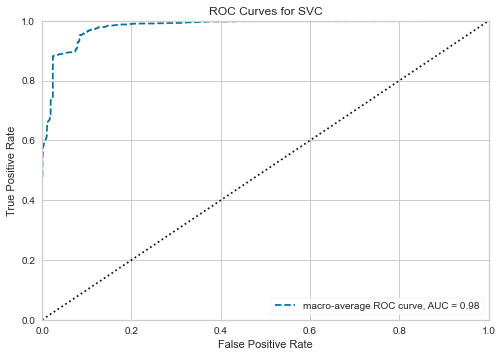

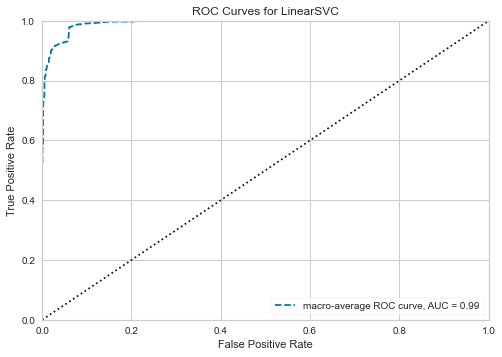

In [60]:
for idx , (param , model) in enumerate(zip(params , pipe)) :

    
    visualizer = ROCAUC(model, classes=[0,1,2,3,4,5,6], micro=False, macro=True, per_class=True)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()
    

micro Vs macro  
  
Micro- and macro-averages (for whatever metric) will compute slightly different things, and thus their interpretation differs. A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance (i.e you may have many more examples of one class than of other classes).